<a href="https://colab.research.google.com/github/EXYNOS-999/COVID19_Global_Forecasting/blob/master/COVID_19_Global_Afghanistan_.99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import statsmodels.tsa.holtwinters as ets

In [284]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [285]:
Afghanistan_Train = pd.read_csv(r"/content/Afganistan_Train.csv")
Afghanistan_Train['LogConfirmedCases'] = np.log(Afghanistan_Train['ConfirmedCases'].replace(0,np.nan))
Afghanistan_Train.head()

,Id,Province/State,Country/Region,Date,ConfirmedCases,Fatalities,LogConfirmedCases
0,1,NaN,Afghanistan,1/22/20,0,0,NaN
1,2,NaN,Afghanistan,1/23/20,0,0,NaN
2,3,NaN,Afghanistan,1/24/20,0,0,NaN
3,4,NaN,Afghanistan,1/25/20,0,0,NaN
4,5,NaN,Afghanistan,1/26/20,0,0,NaN


In [286]:
Afghanistan_Test = pd.read_csv(r"/content/Afghanistan_Test.csv")
Afghanistan_Test.head()

,ForecastId,Province/State,Country/Region,Date,ConfirmedCases,Fatalities,LogConfirmedCases
0,1,NaN,Afghanistan,3/12/20,NaN,NaN,NaN
1,2,NaN,Afghanistan,3/13/20,NaN,NaN,NaN
2,3,NaN,Afghanistan,3/14/20,NaN,NaN,NaN
3,4,NaN,Afghanistan,3/15/20,NaN,NaN,NaN
4,5,NaN,Afghanistan,3/16/20,NaN,NaN,NaN


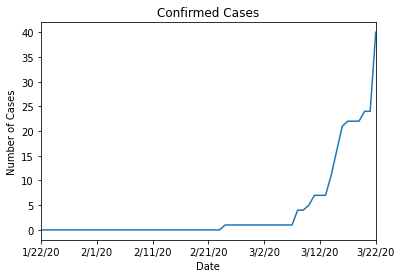

In [287]:
ax = Afghanistan_Train.plot(kind = 'line', x ='Date', y = 'ConfirmedCases', title = 'Confirmed Cases', legend=False)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Cases')
ax

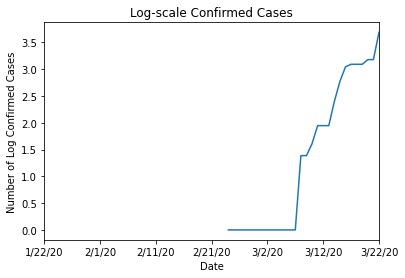

In [288]:
ax = Afghanistan_Train.plot(kind = 'line', x ='Date', y = 'LogConfirmedCases', title='Log-scale Confirmed Cases', legend=False)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Log Confirmed Cases')
ax

In [0]:
Afghanistan_Train_Forcast = Afghanistan_Train[['Date','LogConfirmedCases']]
Afghanistan_Train_Forcast = Afghanistan_Train_Forcast.set_index('Date')
Afghanistan_Train_Forcast = Afghanistan_Train_Forcast.fillna(0)
Afghanistan_Test_Forcast  = Afghanistan_Test[['Date','LogConfirmedCases']]
Afghanistan_Test_Forcast = Afghanistan_Test_Forcast.set_index('Date')

In [290]:
Holt_Afghanistan_Train = ets.ExponentialSmoothing(Afghanistan_Train_Forcast, trend = 'additive', damped = True, seasonal = None).fit(smoothing_slope = 0.99)
Holt_Afghanistan_Forecast = Holt_Afghanistan_Train.forecast(steps = len(Afghanistan_Test_Forcast))
Holt_Afghanistan_Forecast = Holt_Afghanistan_Forecast.to_frame()
Holt_Afghanistan_Forecast.columns = ['LogConfirmedCases']

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [0]:
ConfirmedCases_Forecast_Afghanistan = np.exp(Holt_Afghanistan_Forecast['LogConfirmedCases'])
Fatalities_Forecast_Afghanistan = ConfirmedCases_Forecast_Afghanistan * 0.04

In [0]:
Afghanistan_Test['ConfirmedCases'] = ConfirmedCases_Forecast_Afghanistan.values
Afghanistan_Test['Fatalities'] = Fatalities_Forecast_Afghanistan.values
Afghanistan_Test['LogConfirmedCases'] = Holt_Afghanistan_Forecast.values

In [0]:
Afghanistan_Test_Merge = Afghanistan_Test.drop(['ForecastId'],axis=1)
Afghanistan_Train_Merge = Afghanistan_Train.drop(['Id'],axis=1)
Afghanistan_Final = Afghanistan_Train_Merge.append(Afghanistan_Test_Merge)


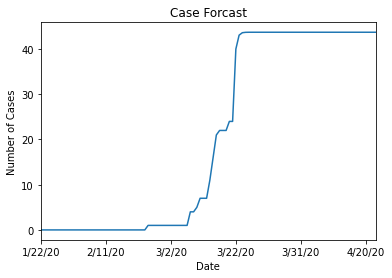

In [294]:
ax = Afghanistan_Final.plot(kind = 'line', x ='Date', y = 'ConfirmedCases', title='Case Forcast',legend=False)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Cases')
ax

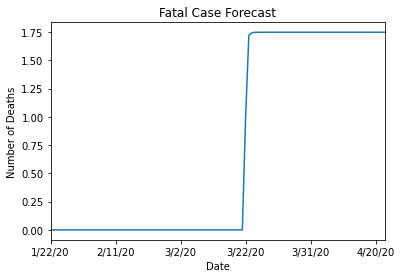

In [295]:
ax = Afghanistan_Final.plot(kind = 'line', x ='Date', y = 'Fatalities', title='Fatal Case Forecast',legend=False)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Deaths')
ax